<a href="https://colab.research.google.com/github/ashia-002/python-oop-pandas-numpy/blob/main/Data_Exploration02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import files
uploaded = files.upload()

Saving merged_pigeon_disease_synthetic.csv to merged_pigeon_disease_synthetic (1).csv


### Convert CSV into dataframe

In [55]:
import pandas as pd
df = pd.read_csv('merged_pigeon_disease_synthetic.csv')
df.head()

,Age,Season,Housing,Rearing,Cleaning,Water,FeedQuality,FeedSupplement,Vaccination,Deworming,Treatment,Disease
0,Adult,Winter,Modern,Semi-scavenging,Regular,Tubewell,Good,1,Irregular,Irregular,NaN,Coccidiosis
1,Adult,Winter,Modern,Semi-scavenging,Irregular,Tubewell,Good,0,NaN,NaN,NaN,Strongyloidiasis
2,Adult,Rainy,Modern,Intensive,Regular,Other,Medium,0,Regular,Irregular,NaN,Salmonella
3,Adult,Summer,Modern,Scavenging,NaN,Tubewell,Poor,1,Irregular,Regular,Village Doctor,Strongyloidiasis
4,Young,Winter,Modern,Semi-scavenging,Regular,Tap,Poor,1,Irregular,Irregular,Village Doctor,ND


### See the shape of the data

In [56]:
df.shape

(723, 12)

### Here the data is too few so we have to extend it based on the data

In [57]:
pip install sdv

In [58]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer
import pandas as pd
import os

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)

# Optional: Save metadata (delete existing first if needed)
metadata_path = "pigeon_metadata.json"
if os.path.exists(metadata_path):
    os.remove(metadata_path)
metadata.save_to_json(metadata_path)

# Step 3: Create and train the CTGAN model
model = CTGANSynthesizer(metadata)
model.fit(df)

# Step 4: Generate synthetic data
synthetic_data = model.sample(5000)

# Step 5: Combine original and synthetic data
ex_df = pd.concat([df, synthetic_data], ignore_index=True)

print(ex_df.shape)
ex_df.head()


/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:167: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


(5723, 12)


,Age,Season,Housing,Rearing,Cleaning,Water,FeedQuality,FeedSupplement,Vaccination,Deworming,Treatment,Disease
0,Adult,Winter,Modern,Semi-scavenging,Regular,Tubewell,Good,1,Irregular,Irregular,NaN,Coccidiosis
1,Adult,Winter,Modern,Semi-scavenging,Irregular,Tubewell,Good,0,NaN,NaN,NaN,Strongyloidiasis
2,Adult,Rainy,Modern,Intensive,Regular,Other,Medium,0,Regular,Irregular,NaN,Salmonella
3,Adult,Summer,Modern,Scavenging,NaN,Tubewell,Poor,1,Irregular,Regular,Village Doctor,Strongyloidiasis
4,Young,Winter,Modern,Semi-scavenging,Regular,Tap,Poor,1,Irregular,Irregular,Village Doctor,ND


In [59]:
ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             5723 non-null   object
 1   Season          5723 non-null   object
 2   Housing         5723 non-null   object
 3   Rearing         5723 non-null   object
 4   Cleaning        3824 non-null   object
 5   Water           5723 non-null   object
 6   FeedQuality     5723 non-null   object
 7   FeedSupplement  5723 non-null   int64 
 8   Vaccination     3909 non-null   object
 9   Deworming       3572 non-null   object
 10  Treatment       3913 non-null   object
 11  Disease         5723 non-null   object
dtypes: int64(1), object(11)
memory usage: 536.7+ KB


In [60]:
ex_df.describe()

,FeedSupplement
count,5723.000000
mean,0.568408
std,0.495341
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### Check the missing values

In [61]:
ex_df.isnull().sum()

,0
Age,0
Season,0
Housing,0
Rearing,0
Cleaning,1899
Water,0
FeedQuality,0
FeedSupplement,0
Vaccination,1814
Deworming,2151


### check for duplicates in each rows

In [62]:
duplicated_rows = ex_df[ex_df.duplicated()]
print(f'Number of duplicated rows: {len(duplicated_rows)}\n')
#print(duplicated_rows)

duplicate_counts = ex_df.value_counts()
duplicate_counts[duplicate_counts > 1]


Number of duplicated rows: 55



Age    Season  Housing      Rearing          Cleaning   Water     FeedQuality  FeedSupplement  Vaccination  Deworming  Treatment       Disease         
Adult  Rainy   Traditional  Scavenging       Regular    Other     Poor         1               Irregular    Irregular  Vet             ND                  2
Young  Summer  Traditional  Semi-scavenging  Regular    Other     Good         0               Regular      Regular    Village Doctor  Salmonella          2
Adult  Rainy   Traditional  Semi-scavenging  Irregular  Tubewell  Good         1               Irregular    Irregular  Vet             ND                  2
                            Intensive        Irregular  Tap       Good         1               Irregular    Irregular  Village Doctor  CRD                 2
       Summer  Traditional  Semi-scavenging  Regular    Other     Poor         0               Regular      Regular    Village Doctor  Salmonella          2
       Rainy   Traditional  Semi-scavenging  Irregular  Tap       Good         1               Regular      Regular    Vet             Salmonella          2
Young  Rainy   Modern       Intensive        Irregular  Tubewell  Medium       1               Regular      Irregular  Vet             Coccidiosis         2
Adult  Rainy   Modern       Intensive        Regular    Tubewell  Medium       0               Regular      Regular    Vet             Salmonella          2
Young  Winter  Modern       Scavenging       Irregular  Tubewell  Poor         0               Irregular    Irregular  Vet             Salmonella          2
Adult  Winter  Modern       Semi-scavenging  Irregular  Tap       Medium       1               Irregular    Regular    Village Doctor  CRD                 2
       Summer  Traditional  Intensive        Irregular  Other     Medium       1               Irregular    Irregular  Vet             Strongyloidiasis    2
Young  Summer  Traditional  Intensive        Regular    Other     Medium       0               Irregular    Regular    Vet             Coccidiosis         2
       Rainy   Modern       Semi-scavenging  Regular    Tap       Good         1               Irregular    Irregular  Village Doctor  Pigeon Pox          2
Name: count, dtype: int64

Number of duplicates per **Disease**

In [63]:
df[df.duplicated(subset=df.columns.difference(['Disease']), keep=False)]


,Age,Season,Housing,Rearing,Cleaning,Water,FeedQuality,FeedSupplement,Vaccination,Deworming,Treatment,Disease
159,Young,Winter,Modern,Scavenging,Irregular,Tubewell,Poor,0,Irregular,Irregular,Vet,Salmonella
200,Young,Rainy,Traditional,Scavenging,NaN,Tap,Poor,1,Regular,NaN,Village Doctor,CRD
222,Young,Winter,Traditional,Intensive,Regular,Other,Poor,1,NaN,Regular,Village Doctor,Strongyloidiasis
234,Adult,Summer,Modern,Intensive,Irregular,Tubewell,Medium,1,Regular,Regular,Village Doctor,Coccidiosis
330,Adult,Summer,Traditional,Semi-scavenging,Irregular,Tap,Good,1,Irregular,NaN,Vet,Coccidiosis
360,Adult,Summer,Traditional,Semi-scavenging,Irregular,Tap,Good,1,Irregular,NaN,Vet,Strongyloidiasis
440,Adult,Winter,Traditional,Intensive,NaN,Other,Poor,0,Irregular,Regular,Vet,Coccidiosis
473,Adult,Summer,Modern,Intensive,Irregular,Tubewell,Medium,1,Regular,Regular,Village Doctor,Pigeon Pox
481,Young,Winter,Traditional,Intensive,Regular,Other,Poor,1,NaN,Regular,Village Doctor,Coccidiosis
644,Adult,Winter,Traditional,Intensive,NaN,Other,Poor,0,Irregular,Regular,Vet,Strongyloidiasis


### Droping all duplicated Sums

In [64]:
df = ex_df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [65]:
df.shape

(5668, 12)

### Droping the column Treatment

In [66]:
df = df.drop(columns=['Treatment'])

### Filling the missing values using mode

In [67]:
df['Cleaning'].fillna(df['Cleaning'].mode()[0], inplace=True)
df['Vaccination'].fillna(df['Vaccination'].mode()[0], inplace=True)
df['Deworming'].fillna(df['Deworming'].mode()[0], inplace=True)

/tmp/ipython-input-2862558532.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cleaning'].fillna(df['Cleaning'].mode()[0], inplace=True)
/tmp/ipython-input-2862558532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [68]:
for col in df.columns:
  print(df[col].value_counts(normalize=True))

Age
Adult    0.592096
Young    0.407904
Name: proportion, dtype: float64
Season
Summer    0.375970
Rainy     0.370501
Winter    0.253529
Name: proportion, dtype: float64
Housing
Traditional    0.577452
Modern         0.422548
Name: proportion, dtype: float64
Rearing
Intensive          0.352682
Scavenging         0.333627
Semi-scavenging    0.313691
Name: proportion, dtype: float64
Cleaning
Regular      0.748589
Irregular    0.251411
Name: proportion, dtype: float64
Water
Other       0.422195
Tap         0.313338
Tubewell    0.264467
Name: proportion, dtype: float64
FeedQuality
Poor      0.359033
Medium    0.323394
Good      0.317572
Name: proportion, dtype: float64
FeedSupplement
1    0.567396
0    0.432604
Name: proportion, dtype: float64
Vaccination
Irregular    0.683663
Regular      0.316337
Name: proportion, dtype: float64
Deworming
Regular      0.747883
Irregular    0.252117
Name: proportion, dtype: float64
Disease
Coccidiosis         0.171489
Salmonella          0.158610
Strongyl

In [69]:
df.isnull().sum() #no missing values

,0
Age,0
Season,0
Housing,0
Rearing,0
Cleaning,0
Water,0
FeedQuality,0
FeedSupplement,0
Vaccination,0
Deworming,0


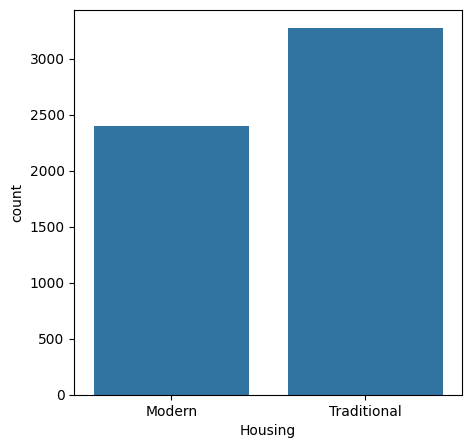

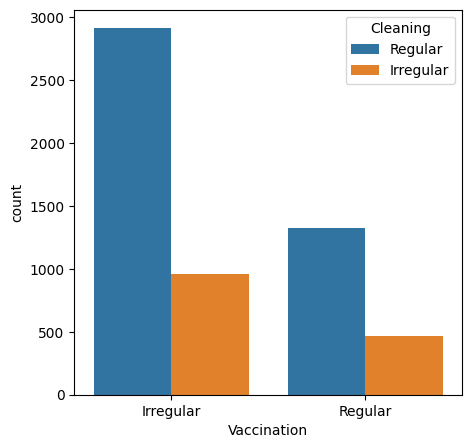

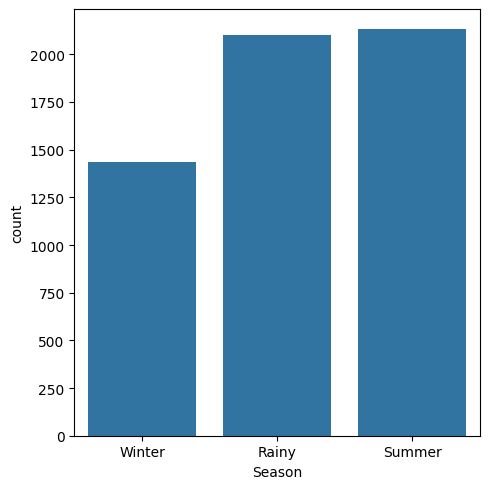

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Housing distribution
plt.figure(figsize=(5,5))
sns.countplot(x="Housing", data=df)
plt.show()

# Vaccination vs Cleaning practices
plt.figure(figsize=(5,5))
sns.countplot(x="Vaccination", hue="Cleaning", data=df)
plt.show()

# Feeding quality distribution
plt.figure(figsize=(5,5))
sns.countplot(x="Season", data=df)
plt.tight_layout()
plt.show()


### Checking Target class balance

In [71]:
print(df['Disease'].value_counts(normalize=True))
print(df['Deworming'].value_counts(normalize=True))

Disease
Coccidiosis         0.171489
Salmonella          0.158610
Strongyloidiasis    0.155081
CRD                 0.137968
Ascariasis          0.129323
ND                  0.125088
Pigeon Pox          0.122442
Name: proportion, dtype: float64
Deworming
Regular      0.747883
Irregular    0.252117
Name: proportion, dtype: float64


### Distribution of diseases

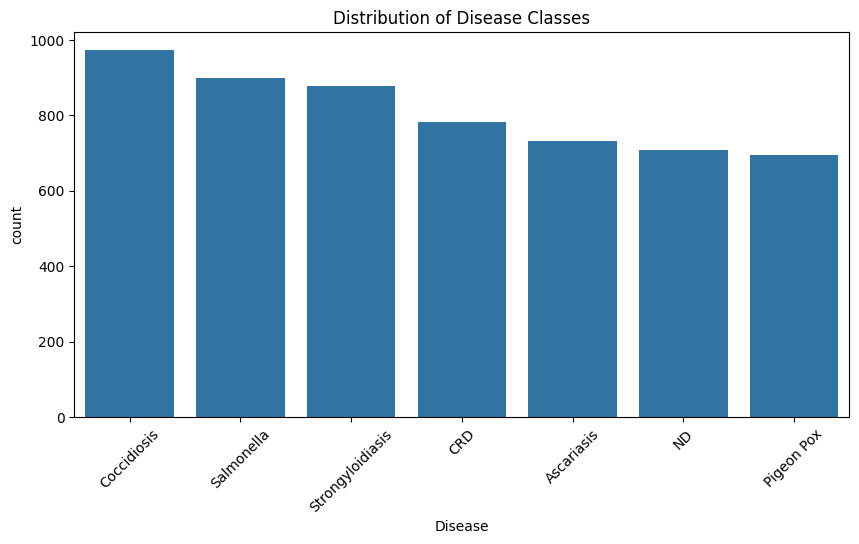

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Disease', order=df['Disease'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Disease Classes')
plt.show()

### converting all categorical values into numerical

In [73]:
for col in df.columns:
  print(f"{col} has {df[col].unique()} unique values")

Age has ['Adult' 'Young'] unique values
Season has ['Winter' 'Rainy' 'Summer'] unique values
Housing has ['Modern' 'Traditional'] unique values
Rearing has ['Semi-scavenging' 'Intensive' 'Scavenging'] unique values
Cleaning has ['Regular' 'Irregular'] unique values
Water has ['Tubewell' 'Other' 'Tap'] unique values
FeedQuality has ['Good' 'Medium' 'Poor'] unique values
FeedSupplement has [1 0] unique values
Vaccination has ['Irregular' 'Regular'] unique values
Deworming has ['Irregular' 'Regular'] unique values
Disease has ['Coccidiosis' 'Strongyloidiasis' 'Salmonella' 'ND' 'CRD' 'Ascariasis'
 'Pigeon Pox'] unique values


For input features (X)

In [82]:
x = df.drop(columns=['Disease'])
# x_encoded = pd.get_dummies(x, drop_first=True) #Binary columns (0/1)
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding for binary/ordinal features
label_cols = ['Age', 'Housing', 'Cleaning', 'Vaccination', 'Deworming']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each label column
for col in label_cols:
    x[col] = le.fit_transform(x[col])

# 2. Ordinal Encoding for FeedQuality (Good > Medium > Poor)
quality_map = {'Poor': 0, 'Medium': 1, 'Good': 2}
x['FeedQuality'] = x['FeedQuality'].map(quality_map)

# 3. One-Hot Encoding for nominal features with more than 2 categories
one_hot_cols = ['Season', 'Rearing', 'Water']
x_encoded = pd.get_dummies(x, columns=one_hot_cols, drop_first=True)

In [83]:
# x_encoded = x_encoded.drop(columns=['Disease'])
x_encoded.head()

,Age,Housing,Cleaning,FeedQuality,FeedSupplement,Vaccination,Deworming,Season_Summer,Season_Winter,Rearing_Scavenging,Rearing_Semi-scavenging,Water_Tap,Water_Tubewell
0,0,0,1,2,1,0,0,False,True,False,True,False,True
1,0,0,0,2,0,0,1,False,True,False,True,False,True
2,0,0,1,1,0,1,0,False,False,False,False,False,False
3,0,0,1,0,1,0,1,True,False,True,False,False,True
4,1,0,1,0,1,0,0,False,True,False,True,True,False


For the target column (y)

In [84]:
from sklearn.preprocessing import LabelEncoder

y = df['Disease']
y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y) #Integer labels (0, 1, 2, ...)

In [85]:
y_encoded

array([2, 6, 5, ..., 0, 4, 2])

### Train Test Splits

In [87]:
from re import X
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42,
)

In [88]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train distribution:\n", pd.Series(y_train).value_counts(normalize=True))
print("y_test distribution:\n", pd.Series(y_test).value_counts(normalize=True))


X_train shape: (4534, 13)
X_test shape: (1134, 13)
y_train distribution:
 2    0.168725
5    0.163211
6    0.157477
1    0.136965
0    0.125496
3    0.124614
4    0.123511
Name: proportion, dtype: float64
y_test distribution:
 2    0.182540
6    0.145503
0    0.144621
1    0.141975
5    0.140212
3    0.126984
4    0.118166
Name: proportion, dtype: float64


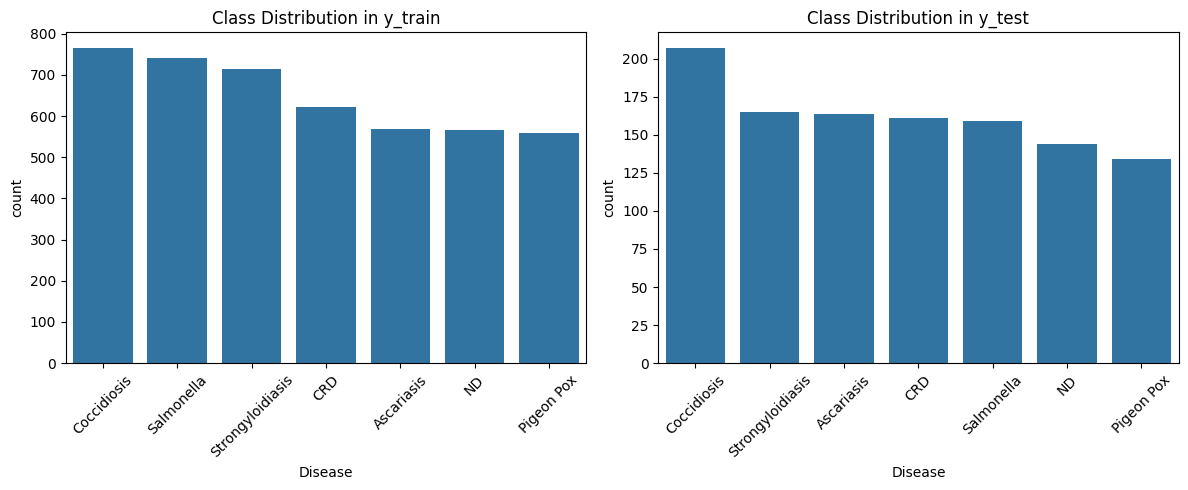

In [89]:

# Convert to Series with original class names (optional, if you used LabelEncoder)
y_train_labels = pd.Series(y_encoder.inverse_transform(y_train), name="Disease")
y_test_labels = pd.Series(y_encoder.inverse_transform(y_test), name="Disease")

# Plot
plt.figure(figsize=(12, 5))

# Train distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_labels, order=y_train_labels.value_counts().index)
plt.title("Class Distribution in y_train")
plt.xticks(rotation=45)

# Test distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_test_labels, order=y_test_labels.value_counts().index)
plt.title("Class Distribution in y_test")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Train the model (Random Forest)

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [91]:
y_pred = rf_model.predict(x_test)

### Evaluate the model

Accuracy: 0.14638447971781304

Classification Report:

                  precision    recall  f1-score   support

      Ascariasis       0.11      0.11      0.11       164
             CRD       0.17      0.16      0.16       161
     Coccidiosis       0.16      0.13      0.14       207
              ND       0.18      0.17      0.18       144
      Pigeon Pox       0.12      0.13      0.12       134
      Salmonella       0.15      0.18      0.16       159
Strongyloidiasis       0.14      0.16      0.15       165

        accuracy                           0.15      1134
       macro avg       0.15      0.15      0.15      1134
    weighted avg       0.15      0.15      0.15      1134



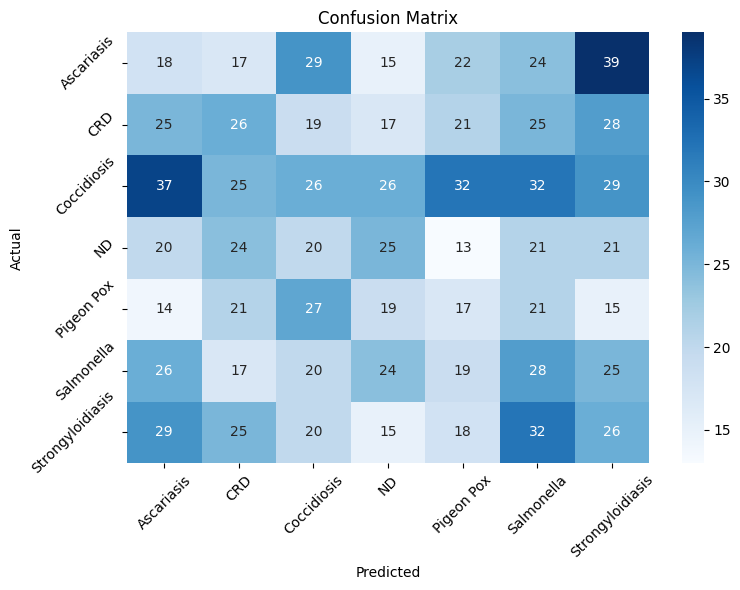

In [92]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_encoder.classes_,
            yticklabels=y_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


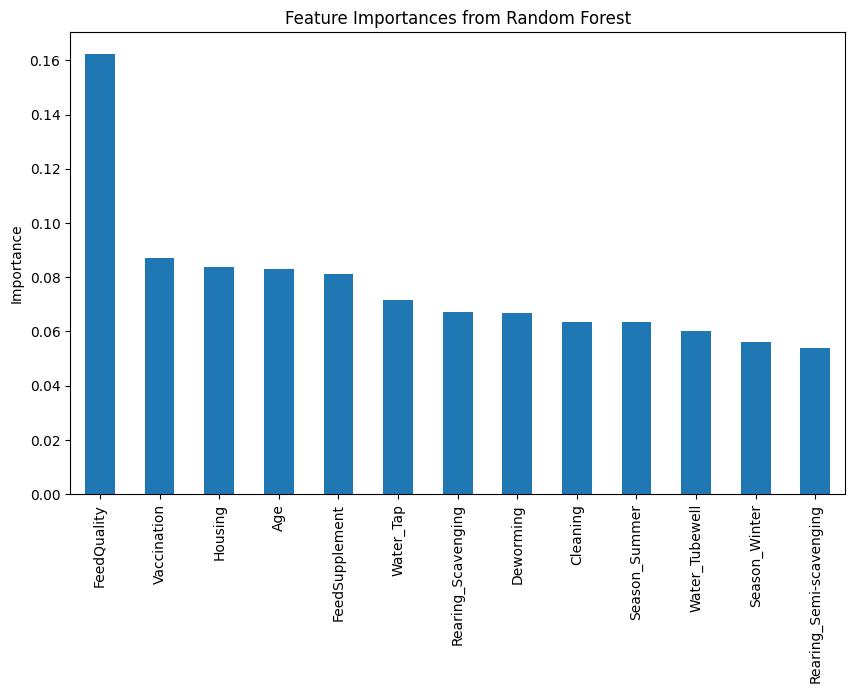

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = x_train.columns  # or list of feature names

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.show()


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.1384479717813051
              precision    recall  f1-score   support

           0       0.09      0.07      0.08       164
           1       0.17      0.16      0.17       161
           2       0.18      0.18      0.18       207
           3       0.14      0.12      0.13       144
           4       0.10      0.09      0.10       134
           5       0.11      0.14      0.13       159
           6       0.15      0.18      0.16       165

    accuracy                           0.14      1134
   macro avg       0.13      0.14      0.13      1134
weighted avg       0.14      0.14      0.14      1134



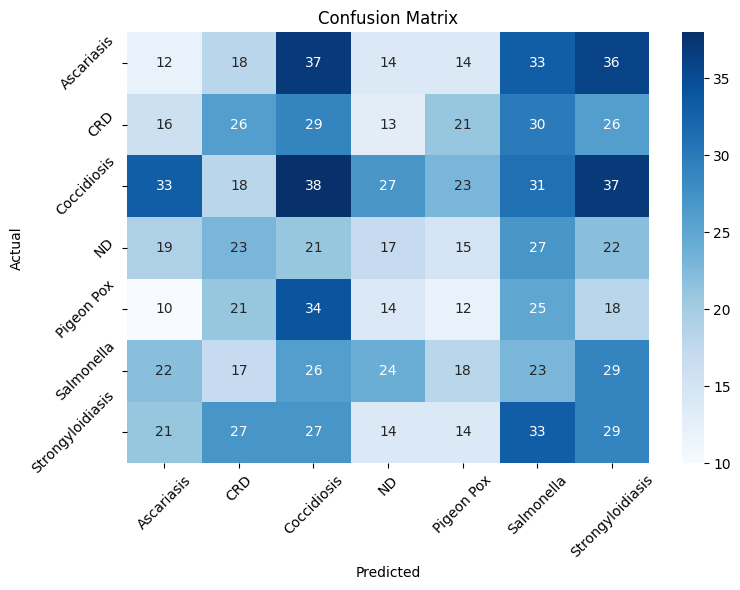

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],          # Number of trees
    'max_depth': [None, 10, 20],         # Maximum tree depth
    'min_samples_split': [2, 5],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2],          # Minimum samples at leaf node
    'max_features': ['sqrt', 'log2', None]     # Number of features to consider at each split
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,              # 3-fold cross-validation
    n_jobs=-1,         # Use all cores
    verbose=2,
    scoring='f1_macro' # You can choose 'accuracy' or other metrics too
)

# Fit on training data
grid_search.fit(x_train, y_train)

# Best params
print("Best hyperparameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_encoder.classes_,
            yticklabels=y_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

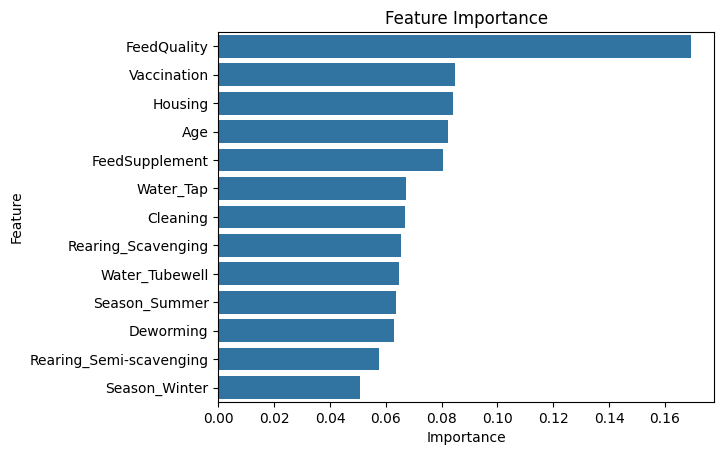

In [96]:
importances = best_rf.feature_importances_
feat_df = pd.DataFrame({'Feature': x_encoded.columns, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.show()


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0            Coccidiosis
1       Strongyloidiasis
2             Salmonella
3       Strongyloidiasis
4                     ND
              ...       
5718         Coccidiosis
5719          Ascariasis
5720          Ascariasis
5721          Pigeon Pox
5722         Coccidiosis
Name: Disease, Length: 5668, dtype: object

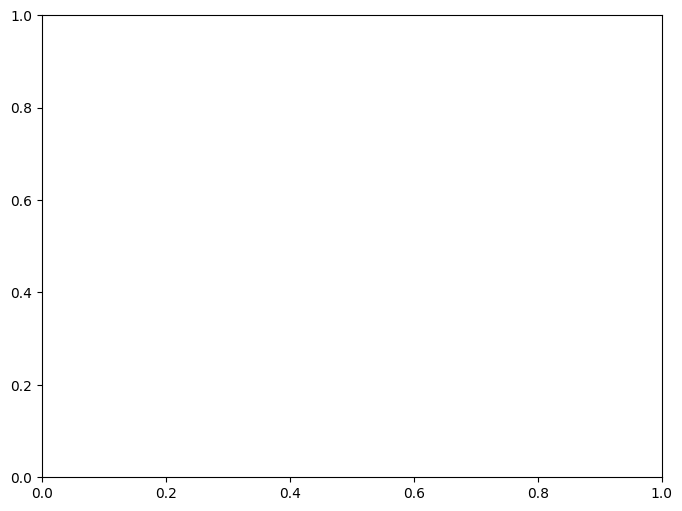

In [100]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_encoded)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Disease")
plt.title("PCA - Class Separation")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()


### Training XGBoost

In [101]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:18:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.14285714285714285
              precision    recall  f1-score   support

           0       0.13      0.07      0.09       164
           1       0.12      0.11      0.11       161
           2       0.17      0.21      0.19       207
           3       0.13      0.09      0.11       144
           4       0.16      0.13      0.15       134
           5       0.12      0.18      0.14       159
           6       0.15      0.19      0.17       165

    accuracy                           0.14      1134
   macro avg       0.14      0.14      0.14      1134
weighted avg       0.14      0.14      0.14      1134



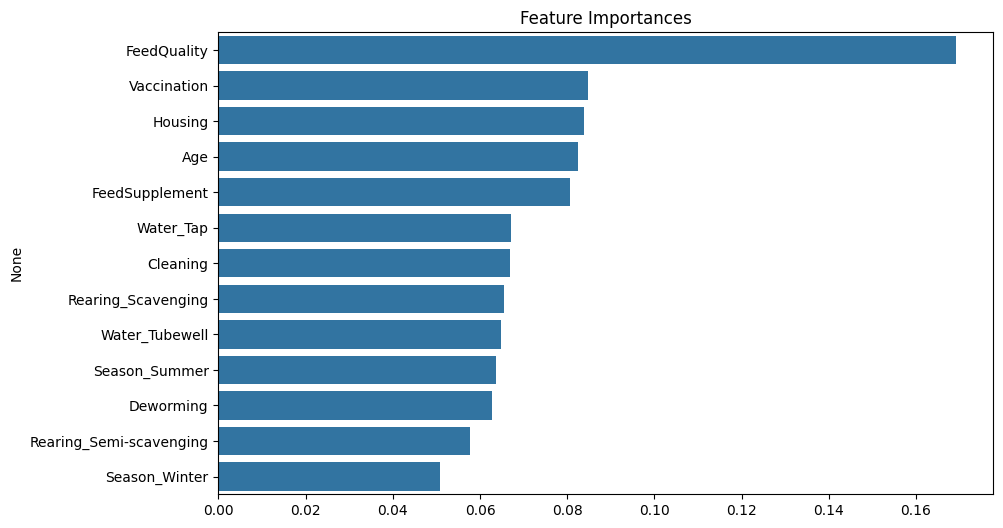

In [102]:
importances = best_rf.feature_importances_
features = x_train.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Feature Importances")
plt.show()

### Feature Engineering and training Random forest again again

In [103]:
# Hygiene Level = Cleaning + Vaccination score
cleaning_map = {'None': 0, 'Irregular': 1, 'Regular': 2}
vaccination_map = {'None': 0, 'Irregular': 1, 'Regular': 2}
deworming_map = {'None': 0, 'Irregular': 1, 'Regular': 2}
rearing_map = {'Scavenging': 0, 'Semi-scavenging': 1, 'Intensive': 2}

df['Cleaning_Score'] = df['Cleaning'].map(cleaning_map)
df['Vaccination_Score'] = df['Vaccination'].map(vaccination_map)
df['Deworming_Score'] = df['Deworming'].map(deworming_map)
df['Rearing_Score'] = df['Rearing'].map(rearing_map)

df['Hygiene_Level'] = df['Cleaning_Score'] + df['Vaccination_Score']
df['Total_Preventive_Care'] = df['Cleaning_Score'] + df['Vaccination_Score'] + df['Deworming_Score'] + df['FeedSupplement']
df['Housing_Season'] = df['Housing'] + "_" + df['Season']


In [104]:
# Drop intermediate numeric columns (optional, they were only used to compute scores)
df.drop(columns=['Cleaning_Score', 'Vaccination_Score', 'Deworming_Score'], inplace=True)

# Separate features and target
X = df.drop(columns=['Disease'])
y = df['Disease']

# Label encode the target
from sklearn.preprocessing import LabelEncoder
y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)


In [105]:
X_encoded.head()

,FeedSupplement,Rearing_Score,Hygiene_Level,Total_Preventive_Care,Age_Young,Season_Summer,Season_Winter,Housing_Traditional,Rearing_Scavenging,Rearing_Semi-scavenging,...,Water_Tubewell,FeedQuality_Medium,FeedQuality_Poor,Vaccination_Regular,Deworming_Regular,Housing_Season_Modern_Summer,Housing_Season_Modern_Winter,Housing_Season_Traditional_Rainy,Housing_Season_Traditional_Summer,Housing_Season_Traditional_Winter
0,1,1,3,5,False,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False
1,0,1,2,4,False,False,True,False,False,True,...,True,False,False,False,True,False,True,False,False,False
2,0,2,4,5,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
3,1,0,3,6,False,True,False,False,True,False,...,True,False,True,False,True,True,False,False,False,False
4,1,1,3,5,True,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,False


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))


Accuracy: 0.1781305114638448
                  precision    recall  f1-score   support

      Ascariasis       0.15      0.14      0.15       147
             CRD       0.16      0.16      0.16       156
     Coccidiosis       0.21      0.27      0.24       194
              ND       0.18      0.15      0.16       142
      Pigeon Pox       0.16      0.14      0.15       139
      Salmonella       0.16      0.16      0.16       180
Strongyloidiasis       0.19      0.20      0.19       176

        accuracy                           0.18      1134
       macro avg       0.17      0.17      0.17      1134
    weighted avg       0.18      0.18      0.18      1134



In [108]:
importances = rf.feature_importances_
feature_names = X_encoded.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances from Random Forest")
plt.bar(range(20), importances[indices][:20], align="center")
plt.xticks(range(20), feature_names[indices][:20], rotation=90)
plt.tight_layout()
plt.show()


NameError: name 'np' is not defined